In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [3]:
dataset2 = pd.read_csv(r'dataset3.csv')
dataset2.head()

,Derivation cohort,LOS_Y,LOS,Death,Age,Severity,Black,White,Asian,Latino,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
0,1,1,1,0,>80,3,0,0,0,0,...,0,1,0.4999,0,0,0.0,0,1,0.01,0
1,1,1,2,1,>60,7,0,1,0,0,...,1,1,14.9000,1,1,0.6,1,1,1.20,1
2,1,1,2,1,>80,7,0,1,0,0,...,1,1,33.9000,1,1,1.2,1,0,0.00,0
3,1,1,15,0,>70,9,1,0,0,0,...,1,1,18.4000,1,1,7.3,1,1,0.05,0
4,1,1,9,0,>70,7,1,0,0,0,...,1,1,11.6000,1,0,0.0,0,1,0.01,0


In [3]:
dataset2.describe()

,Derivation cohort,LOS_Y,LOS,Death,Severity,Black,White,Asian,Latino,MI,...,Ferritin > 300,CrctProtYes,CrctProtein,C-Reactive Prot > 10,ProCalCYes,Procalcitonin,Procalciton > 0.1,TropYes,Troponin,Troponin > 0.1
count,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,...,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000,4711.000000
mean,0.499682,0.927616,7.160263,0.243685,3.586287,0.369985,0.098917,0.025685,0.372108,0.042666,...,0.543621,0.836128,10.314919,0.393335,0.655487,1.585601,0.365952,0.863935,0.051558,0.095521
std,0.500053,0.259150,7.029782,0.429350,2.289303,0.482852,0.298583,0.158209,0.483418,0.202125,...,0.498146,0.370198,11.223356,0.488542,0.475260,6.262625,0.481747,0.342893,0.268160,0.293965
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000
50%,0.000000,1.000000,5.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,6.500000,0.000000,1.000000,0.100000,0.000000,1.000000,0.010000,0.000000
75%,1.000000,1.000000,9.000000,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,16.000000,1.000000,1.000000,0.400000,1.000000,1.000000,0.020000,0.000000
max,1.000000,1.000000,56.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,100.000100,1.000000,1.000000,50.000100,1.000000,1.000000,9.560000,1.000000


In [4]:
dataset2.isnull().sum()

Derivation cohort    0
LOS_Y                0
LOS                  0
Death                0
Age                  0
                    ..
Procalcitonin        0
Procalciton > 0.1    0
TropYes              0
Troponin             0
Troponin > 0.1       0
Length: 85, dtype: int64

In [5]:
dataset2.shape

(4711, 85)

In [6]:
dataset2['Severity'].value_counts()

3     806
2     729
4     728
5     554
1     537
6     395
0     390
7     305
8     155
9      75
10     27
11     10
Name: Severity, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Age distribution'}, xlabel='Age.1', ylabel='Density'>

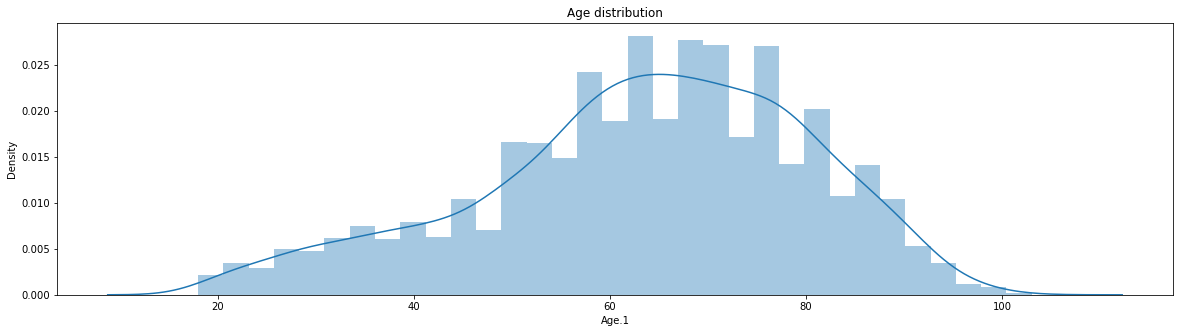

In [5]:
plt.figure(figsize=(20,5))
plt.title('Age distribution')
sns.distplot(dataset2['Age.1'])

<AxesSubplot:title={'center':'Age with Death(suvived and dead)'}, ylabel='Age.1'>

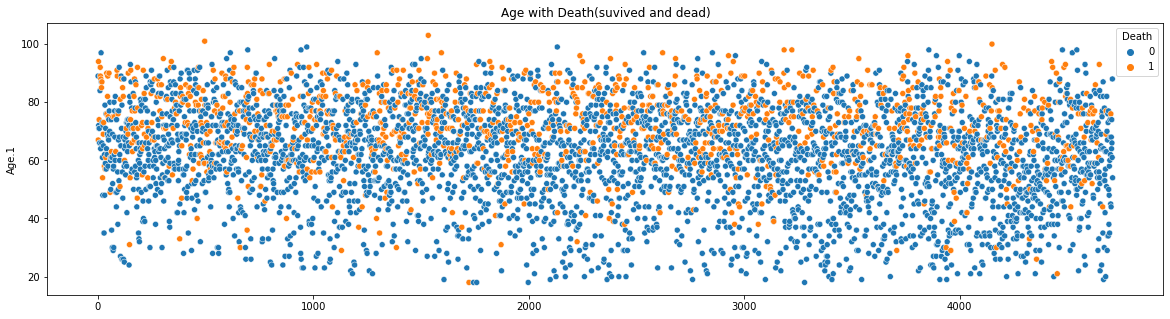

In [8]:
plt.figure(figsize=(20,5))
plt.title("Age with Death(suvived and dead)")
sns.scatterplot(x=dataset2.index, y=dataset2['Age.1'], hue=dataset2.Death)

<AxesSubplot:ylabel='None'>

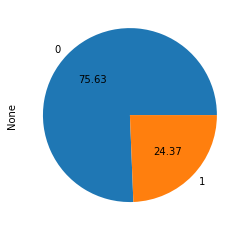

In [9]:
dataset2.groupby('Death').size().plot(kind='pie', autopct='%.2f')

In [10]:
print(dataset2['Death'].value_counts())

0    3563
1    1148
Name: Death, dtype: int64


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Death', ylabel='count'>

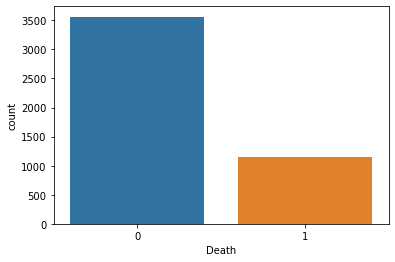

In [11]:
sns.countplot(dataset2['Death'])

In [12]:
pca=PCA(n_components=12)
x=pca.fit_transform(dataset2.iloc[:,5:82])
x.shape


(4711, 12)

In [13]:
scaler=StandardScaler()
scale_x=scaler.fit_transform(x)
scale_x

array([[-0.34192297, -0.04917202, -0.17161938, ..., -1.63546643,
         0.5833679 , -0.98566534],
       [-0.05590834, -0.05475288,  0.09749085, ...,  1.63074758,
         0.45419654,  0.01586135],
       [-0.13724297,  0.09168234, -0.16803048, ..., -1.33971105,
        -0.67321457,  1.63161492],
       ...,
       [-0.26478952, -0.05074185, -0.16245183, ..., -0.09271119,
         0.24399718, -0.86539378],
       [ 0.04067679, -0.05678304, -0.13200279, ..., -1.7702044 ,
        -0.0829746 , -0.64860549],
       [-0.34197522, -0.04909309, -0.33682526, ..., -0.16415762,
        -1.8561291 , -0.12413337]])

# By using SMOTE

In [14]:
smote=SMOTE()
balanced_x,balanced_y=smote.fit_resample(scale_x,dataset2.iloc[:,3])
print(balanced_x.shape)
print(balanced_y.shape)

(7126, 12)
(7126,)


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Death', ylabel='count'>

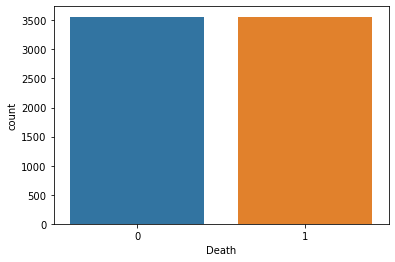

In [15]:
sns.countplot(balanced_y)

## Splitting the DATASET

In [25]:
train_x,test_x,train_y,test_y=train_test_split(balanced_x,balanced_y,test_size=0.30,random_state=123)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(4988, 12)
(4988,)
(2138, 12)
(2138,)


### Using Random Forest Classifier

In [26]:
rf=RandomForestClassifier()
rf.fit(train_x,train_y)
pred=rf.predict(test_x)
accuracy_rf=metrics.accuracy_score(test_y,pred)
print("The confussion metrix for Random forest is:\n",metrics.confusion_matrix(test_y,pred))
print("The accuracy of Random Forest Classifier is:\t\t",accuracy_rf)
print("The recal score of Random Forest Classifier is:\t\t",metrics.recall_score(test_y,pred))
print("The precision of Random Forest Classifier is:\t\t",metrics.precision_score(test_y,pred))
print("The f1 score of Random Forest Classifier is:\t\t",metrics.f1_score(test_y,pred))

The confussion metrix for Random forest is:
 [[907 188]
 [160 883]]
The accuracy of Random Forest Classifier is:		 0.8372310570626754
The recal score of Random Forest Classifier is:		 0.8465963566634708
The precision of Random Forest Classifier is:		 0.8244631185807656
The f1 score of Random Forest Classifier is:		 0.8353831598864712


### Using AdaBoost Classifier

In [27]:
ada=AdaBoostClassifier()
ada.fit(train_x,train_y)
pred_ada=ada.predict(test_x)
accuracy_ada=metrics.accuracy_score(test_y,pred_ada)
print("The confussion metrix for AdaBoost is:\n",metrics.confusion_matrix(test_y,pred_ada))
print("The accuracy of AdaBoost Classifier is:\t\t",accuracy_ada)
print("The recal score of AdaBoost Classifier is is:\t\t",metrics.recall_score(test_y,pred_ada))
print("The precision of AdaBoost Classifier is:\t\t",metrics.precision_score(test_y,pred_ada))
print("The f1 score of AdaBoost Classifier is:\t\t",metrics.f1_score(test_y,pred_ada))

The confussion metrix for AdaBoost is:
 [[787 308]
 [297 746]]
The accuracy of AdaBoost Classifier is:		 0.7170252572497662
The recal score of AdaBoost Classifier is is:		 0.7152444870565676
The precision of AdaBoost Classifier is:		 0.7077798861480076
The f1 score of AdaBoost Classifier is:		 0.7114926084883166


### Using Decision Tree Classifier

In [28]:
dsc=DecisionTreeClassifier()
dsc.fit(train_x,train_y)
pred_dsc=dsc.predict(test_x)
accuracy_dsc=metrics.accuracy_score(test_y,pred_dsc)
print("The confussion metrix for Decision Tree is:\n",metrics.confusion_matrix(test_y,pred_dsc))
print("The accuracy of Decision Tree Classifier is:\t\t",accuracy_dsc)
print("The recal score of Decision Tree Classifier is is:\t\t",metrics.recall_score(test_y,pred_dsc))
print("The precision of Decision Tree Classifier is:\t\t",metrics.precision_score(test_y,pred_dsc))
print("The f1 score of Decision Tree Classifier is:\t\t",metrics.f1_score(test_y,pred_dsc))

The confussion metrix for Decision Tree is:
 [[823 272]
 [236 807]]
The accuracy of Decision Tree Classifier is:		 0.7623947614593077
The recal score of Decision Tree Classifier is is:		 0.7737296260786194
The precision of Decision Tree Classifier is:		 0.7479147358665431
The f1 score of Decision Tree Classifier is:		 0.760603204524034


### Using Logistic Regression

In [29]:
lr=LogisticRegression()
lr.fit(train_x,train_y)
pred_lr=lr.predict(test_x)
accuracy_lr=metrics.accuracy_score(test_y,pred_lr)
print("The confussion metrix for Logistic Regression is:\n",metrics.confusion_matrix(test_y,pred_lr))
print("The accuracy of Logistic Regression is:\t\t",accuracy_lr)
print("The recal score of Logistic Regression is is:\t\t",metrics.recall_score(test_y,pred_lr))
print("The precision of Logistic Regression is:\t\t",metrics.precision_score(test_y,pred_lr))
print("The f1 score of Logistic Regression is:\t\t",metrics.f1_score(test_y,pred_lr))

The confussion metrix for Logistic Regression is:
 [[752 343]
 [315 728]]
The accuracy of Logistic Regression is:		 0.6922357343311506
The recal score of Logistic Regression is is:		 0.697986577181208
The precision of Logistic Regression is:		 0.6797385620915033
The f1 score of Logistic Regression is:		 0.6887417218543046


### Using KNN Classifier

In [30]:
kn=KNeighborsClassifier()
kn.fit(train_x,train_y)
pred_kn=kn.predict(test_x)
accuracy_knn=metrics.recall_score(test_y,pred_kn)
print("The confussion metrix for KNN Classifier is:\n",metrics.confusion_matrix(test_y,pred_kn))
print("The accuracy of KNN Classifier is:\t\t",accuracy_knn)
print("The recal score of KNN Classifier is is:\t\t",metrics.recall_score(test_y,pred_kn))
print("The precision of KNN Classifier is:\t\t",metrics.precision_score(test_y,pred_kn))
print("The f1 score of KNN Classifier is:\t\t",metrics.f1_score(test_y,pred_kn))

The confussion metrix for KNN Classifier is:
 [[789 306]
 [112 931]]
The accuracy of KNN Classifier is:		 0.8926174496644296
The recal score of KNN Classifier is is:		 0.8926174496644296
The precision of KNN Classifier is:		 0.7526273241713823
The f1 score of KNN Classifier is:		 0.8166666666666668


## Using SVM Classifier

In [31]:
svc=SVC()
svc.fit(train_x,train_y)
pred_svc=svc.predict(test_x)
accuracy_svm=metrics.accuracy_score(test_y,pred_svc)
print("The confussion metrix for SVM Classifier is:\n",metrics.confusion_matrix(test_y,pred_svc))
print("The accuracy of SVM Classifier is:\t\t",accuracy_svm)
print("The recal score of SVM Classifier is is:\t\t",metrics.recall_score(test_y,pred_svc))
print("The precision of SVM Classifier is:\t\t",metrics.precision_score(test_y,pred_svc))
print("The f1 score of SVM Classifier is:\t\t",metrics.f1_score(test_y,pred_svc))

The confussion metrix for SVM Classifier is:
 [[857 238]
 [253 790]]
The accuracy of SVM Classifier is:		 0.7703461178671656
The recal score of SVM Classifier is is:		 0.7574304889741131
The precision of SVM Classifier is:		 0.7684824902723736
The f1 score of SVM Classifier is:		 0.7629164654756158


### Comparision Of Models while Using SMOTE

Text(0.5, 1.0, 'Comparision of Models based on  their ACCURACY with smote\n\n\n')

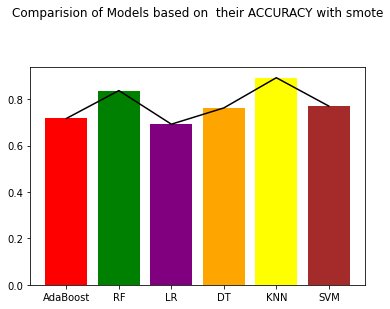

In [47]:
plt.bar(['AdaBoost','RF','LR','DT','KNN','SVM'],[accuracy_ada,accuracy_rf,accuracy_lr,accuracy_dsc,accuracy_knn,accuracy_svm],color=['red','green','purple','orange','yellow','brown'])
plt.plot([accuracy_ada,accuracy_rf,accuracy_lr,accuracy_dsc,accuracy_knn,accuracy_svm],color='black')
plt.title('Comparision of Models based on  their ACCURACY with smote\n\n\n')

In [33]:
print(max(accuracy_ada,accuracy_rf,accuracy_lr,accuracy_dsc,accuracy_knn,accuracy_svm))

0.8926174496644296


So as we can see that with the help of above comparision that when are balancing the dataset with the help of SMOTE knn is giving the better accuracy than the rest of classification algorithms.

# Without Using SMOTE

## Splitting the DATASET

In [35]:
train_wsx,test_wsx,train_wsy,test_wsy=train_test_split(scale_x,dataset2['Death'],test_size=0.30,random_state=111)
print(train_wsx.shape)
print(train_wsy.shape)
print(test_wsx.shape)
print(test_wsy.shape)

(3297, 12)
(3297,)
(1414, 12)
(1414,)


## Training Models

### Using Random Forest Classifier

In [36]:
rf=RandomForestClassifier()
rf.fit(train_wsx,train_wsy)
pred_ws=rf.predict(test_wsx)
accuracy_wrf=metrics.accuracy_score(test_wsy,pred_ws)
print("The confussion metrix for Random forest is:\n",metrics.confusion_matrix(test_wsy,pred_ws))
print("The accuracy of Random Forest Classifier is:\t\t",accuracy_wrf)
print("The recal score of Random Forest Classifier is:\t\t",metrics.recall_score(test_wsy,pred_ws))
print("The precision of Random Forest Classifier is:\t\t",metrics.precision_score(test_wsy,pred_ws))
print("The f1 score of Random Forest Classifier is:\t\t",metrics.f1_score(test_wsy,pred_ws))

The confussion metrix for Random forest is:
 [[1031   78]
 [ 160  145]]
The accuracy of Random Forest Classifier is:		 0.8316831683168316
The recal score of Random Forest Classifier is:		 0.47540983606557374
The precision of Random Forest Classifier is:		 0.6502242152466368
The f1 score of Random Forest Classifier is:		 0.5492424242424242


### Using AdaBoost Classifier

In [37]:
ada_ws=AdaBoostClassifier()
ada_ws.fit(train_wsx,train_wsy)
pred_wsada=ada_ws.predict(test_wsx)
accuracy_wada=metrics.accuracy_score(test_wsy,pred_wsada)
print("The confussion metrix for AdaBoost is:\n",metrics.confusion_matrix(test_wsy,pred_wsada))
print("The accuracy of AdaBoost Classifier is:\t\t",accuracy_wada)
print("The recal score of AdaBoost Classifier is is:\t\t",metrics.recall_score(test_wsy,pred_wsada))
print("The precision of AdaBoost Classifier is:\t\t",metrics.precision_score(test_wsy,pred_wsada))
print("The f1 score of AdaBoost Classifier is:\t\t",metrics.f1_score(test_wsy,pred_wsada))

The confussion metrix for AdaBoost is:
 [[1024   85]
 [ 163  142]]
The accuracy of AdaBoost Classifier is:		 0.8246110325318247
The recal score of AdaBoost Classifier is is:		 0.46557377049180326
The precision of AdaBoost Classifier is:		 0.6255506607929515
The f1 score of AdaBoost Classifier is:		 0.5338345864661654


### Using Decision Tree Classifier

In [38]:
dsc_ws=DecisionTreeClassifier()
dsc_ws.fit(train_wsx,train_wsy)
pred_wsdsc=dsc_ws.predict(test_wsx)
accuracy_wdsc=metrics.accuracy_score(test_wsy,pred_wsdsc)
print("The confussion metrix for Decision Tree is:\n",metrics.confusion_matrix(test_wsy,pred_wsdsc))
print("The accuracy of Decision Tree Classifier is:\t\t",accuracy_wdsc)
print("The recal score of Decision Tree Classifier is is:\t\t",metrics.recall_score(test_wsy,pred_wsdsc))
print("The precision of Decision Tree Classifier is:\t\t",metrics.precision_score(test_wsy,pred_wsdsc))
print("The f1 score of Decision Tree Classifier is:\t\t",metrics.f1_score(test_wsy,pred_wsdsc))

The confussion metrix for Decision Tree is:
 [[909 200]
 [159 146]]
The accuracy of Decision Tree Classifier is:		 0.7461103253182461
The recal score of Decision Tree Classifier is is:		 0.4786885245901639
The precision of Decision Tree Classifier is:		 0.42196531791907516
The f1 score of Decision Tree Classifier is:		 0.44854070660522277


### Using Logistic Regression

In [39]:
lr_ws=LogisticRegression()
lr_ws.fit(train_wsx,train_wsy)
pred_wslr=lr_ws.predict(test_wsx)
accuracy_wlr=metrics.accuracy_score(test_wsy,pred_wslr)
print("The confussion metrix for Logistic Regression is:\n",metrics.confusion_matrix(test_wsy,pred_wslr))
print("The accuracy of Logistic Regression is:\t\t",accuracy_wlr)
print("The recal score of Logistic Regression is is:\t\t",metrics.recall_score(test_wsy,pred_wslr))
print("The precision of Logistic Regression is:\t\t",metrics.precision_score(test_wsy,pred_wslr))
print("The f1 score of Logistic Regression is:\t\t",metrics.f1_score(test_wsy,pred_wslr))

The confussion metrix for Logistic Regression is:
 [[1043   66]
 [ 203  102]]
The accuracy of Logistic Regression is:		 0.8097595473833098
The recal score of Logistic Regression is is:		 0.3344262295081967
The precision of Logistic Regression is:		 0.6071428571428571
The f1 score of Logistic Regression is:		 0.4312896405919662


### Using SVM

In [40]:
svc_ws=SVC()
svc_ws.fit(train_wsx,train_wsy)
pred_svcws=svc_ws.predict(test_wsx)
accuracy_wsvm=metrics.accuracy_score(test_wsy,pred_svcws)
print("The confussion metrix for SVM Classifier is:\n",metrics.confusion_matrix(test_wsy,pred_svcws))
print("The accuracy of SVM Classifier is:\t\t",accuracy_wsvm)
print("The recal score of SVM Classifier is is:\t\t",metrics.recall_score(test_wsy,pred_svcws))
print("The precision of SVM Classifier is:\t\t",metrics.precision_score(test_wsy,pred_svcws))
print("The f1 score of SVM Classifier is:\t\t",metrics.f1_score(test_wsy,pred_svcws))

The confussion metrix for SVM Classifier is:
 [[1061   48]
 [ 193  112]]
The accuracy of SVM Classifier is:		 0.8295615275813296
The recal score of SVM Classifier is is:		 0.36721311475409835
The precision of SVM Classifier is:		 0.7
The f1 score of SVM Classifier is:		 0.4817204301075268


### Using KNN

In [41]:
kn_ws=KNeighborsClassifier()
kn_ws.fit(train_wsx,train_wsy)
pred_knws=kn_ws.predict(test_wsx)
accuracy_wknn=metrics.accuracy_score(test_wsy,pred_knws)
print("The confussion metrix for KNN Classifier is:\n",metrics.confusion_matrix(test_wsy,pred_knws))
print("The accuracy of KNN Classifier is:\t\t",accuracy_wknn)
print("The recal score of KNN Classifier is is:\t\t",metrics.recall_score(test_wsy,pred_knws))
print("The precision of KNN Classifier is:\t\t",metrics.precision_score(test_wsy,pred_knws))
print("The f1 score of KNN Classifier is:\t\t",metrics.f1_score(test_wsy,pred_knws))

The confussion metrix for KNN Classifier is:
 [[1029   80]
 [ 187  118]]
The accuracy of KNN Classifier is:		 0.8111739745403111
The recal score of KNN Classifier is is:		 0.38688524590163936
The precision of KNN Classifier is:		 0.5959595959595959
The f1 score of KNN Classifier is:		 0.46918489065606367


### Comparision Of Models Without using SMOTE

Text(0.5, 1.0, 'Comparision of Models based on  their ACCURACY without smote\n\n\n')

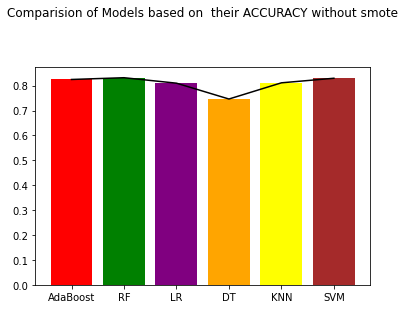

In [42]:
plt.bar(['AdaBoost','RF','LR','DT','KNN','SVM'],[accuracy_wada,accuracy_wrf,accuracy_wlr,accuracy_wdsc,accuracy_wknn,accuracy_wsvm],color=['red','green','purple','orange','yellow','brown'])
plt.plot([accuracy_wada,accuracy_wrf,accuracy_wlr,accuracy_wdsc,accuracy_wknn,accuracy_wsvm],color='black')
plt.title('Comparision of Models based on  their ACCURACY without smote\n\n\n')

In [43]:
print(max([accuracy_wada,accuracy_wrf,accuracy_wlr,accuracy_wdsc,accuracy_wknn,accuracy_wsvm]))

0.8316831683168316


Text(0.5, 1.0, 'Comparision of AdaBoost Models based on  their ACCURACY\n\n\n')

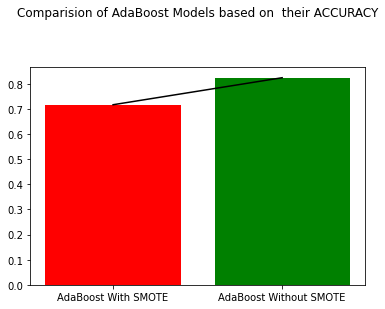

In [44]:
plt.bar(['AdaBoost With SMOTE','AdaBoost Without SMOTE'],[accuracy_ada,accuracy_wada],color=['red','green'])
plt.plot([accuracy_ada,accuracy_wada],color='black')
plt.title('Comparision of AdaBoost Models based on  their ACCURACY\n\n\n')

Here we can see that the accuracy of AdaBoost classifier increases in the case of using dataset without balancing

Text(0.5, 1.0, 'Comparision of Random Forest Models based on  their ACCURACY\n\n\n')

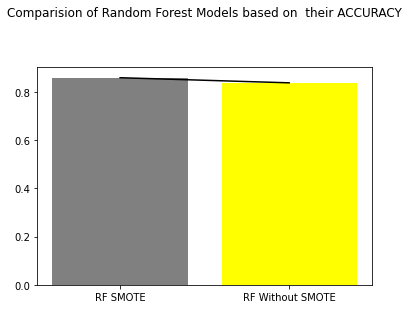

In [42]:
plt.bar(['RF SMOTE','RF Without SMOTE'],[accuracy_rf,accuracy_wrf],color=['grey','yellow'])
plt.plot([accuracy_rf,accuracy_wrf],color='black')
plt.title('Comparision of Random Forest Models based on  their ACCURACY\n\n\n')

Here we can see that the accuracy of Random Forest classifier Decreases in the case of using dataset without balancing

Text(0.5, 1.0, 'Comparision of Logistic Regression Models based on  their ACCURACY\n\n\n')

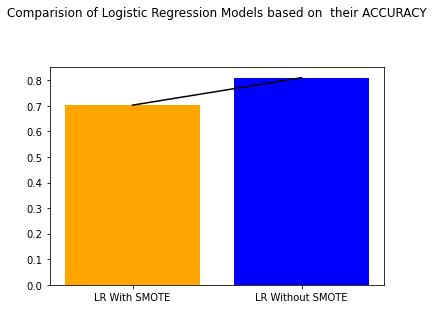

In [41]:
plt.bar(['LR With SMOTE','LR Without SMOTE'],[accuracy_lr,accuracy_wlr],color=['orange','blue'])
plt.plot([accuracy_lr,accuracy_wlr],color='black')
plt.title('Comparision of Logistic Regression Models based on  their ACCURACY\n\n\n')

Here we can see that the accuracy of Logistic Regression increases in the case of using dataset without balancing

Text(0.5, 1.0, 'Comparision of KNN Models based on  their ACCURACY\n\n\n')

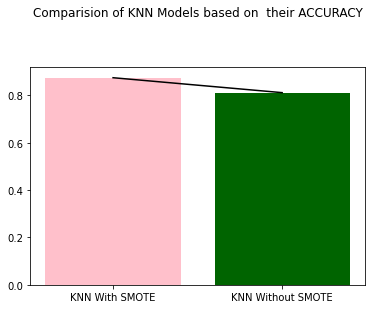

In [43]:
plt.bar(['KNN With SMOTE','KNN Without SMOTE'],[accuracy_knn,accuracy_wknn],color=['pink','darkgreen'])
plt.plot([accuracy_knn,accuracy_wknn],color='black')
plt.title('Comparision of KNN Models based on  their ACCURACY\n\n\n')

Here we can see that the accuracy of KNN classifier Decreases in the case of using dataset without balancing

Text(0.5, 1.0, 'Comparision of SVM Models based on  their ACCURACY\n\n\n')

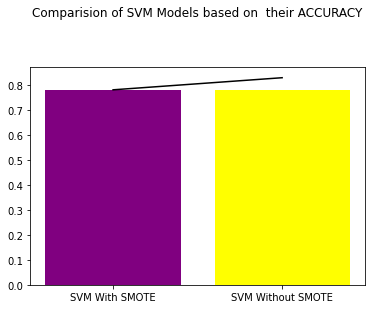

In [46]:
plt.bar(['SVM With SMOTE','SVM Without SMOTE'],[accuracy_svm,accuracy_svm],color=['purple','yellow'])
plt.plot([accuracy_svm,accuracy_wsvm],color='black')
plt.title('Comparision of SVM Models based on  their ACCURACY\n\n\n')

Here we can see that the accuracy of SVM classifier Increases in the case of using dataset without balancing

Text(0.5, 1.0, 'Comparision of Decision Tree Models based on  their ACCURACY\n\n\n')

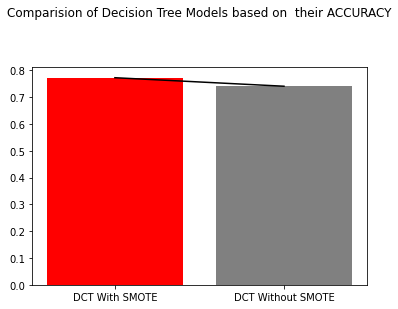

In [47]:
plt.bar(['DCT With SMOTE','DCT Without SMOTE'],[accuracy_dsc,accuracy_wdsc],color=['red','grey'])
plt.plot([accuracy_dsc,accuracy_wdsc],color='black')
plt.title('Comparision of Decision Tree Models based on  their ACCURACY\n\n\n')

Here we can see that the accuracy of Decision Tree classifier Decreases in the case of using dataset without balancing

Also we can conclude with the help of scatter plot that as the age increases the number of death also increases